In [12]:
import highlighter
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [13]:
df=PandasTools.LoadSDF('caco2.sdf',smilesName='Smiles')

In [15]:
def fingerprints_inputs2(dataframe):
        X=np.array([GetMorganFingerprintAsBitVect(mol,radius=2,nBits=2048,useFeatures=True) for mol in [Chem.MolFromSmiles(m) for m in list(dataframe.Smiles)]])
        y=dataframe.activity.astype('float')
        return X,y

X,y=fingerprints_inputs2(df)

In [16]:
model=RandomForestRegressor().fit(X,y)

In [19]:
columns=[f'fp_{i}' for i in range(2048)]

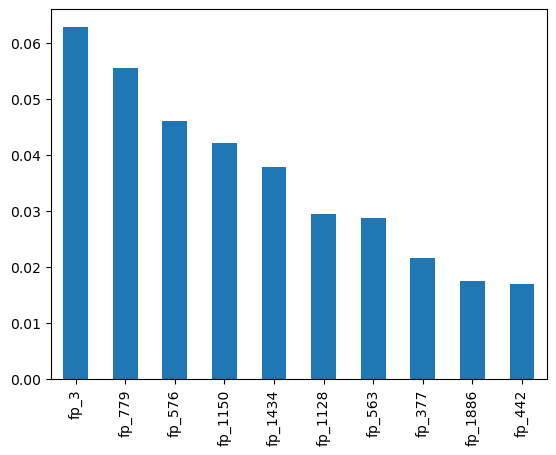

In [28]:
imp=pd.Series(data=model.feature_importances_,index=columns).sort_values(ascending=False)
imp[:10].plot.bar();

In [36]:
df_fp=pd.DataFrame(X,columns=columns)

indexes=df_fp[(df_fp.fp_3==1)&(df_fp.fp_779)].index.values

In [45]:
mols=df.loc[indexes,'Smiles'].tolist()

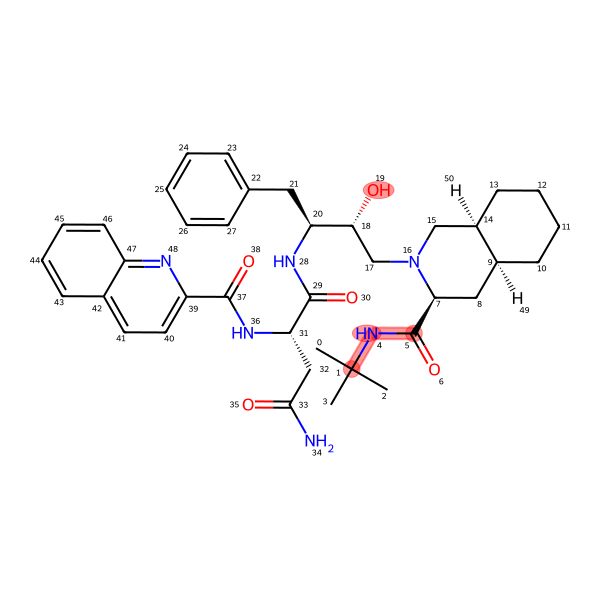

In [53]:
highlighter_instance = highlighter.highlighter([mols[0]])

highlighter_instance.highlighting(fingerprint_numbers=[[3,779]])

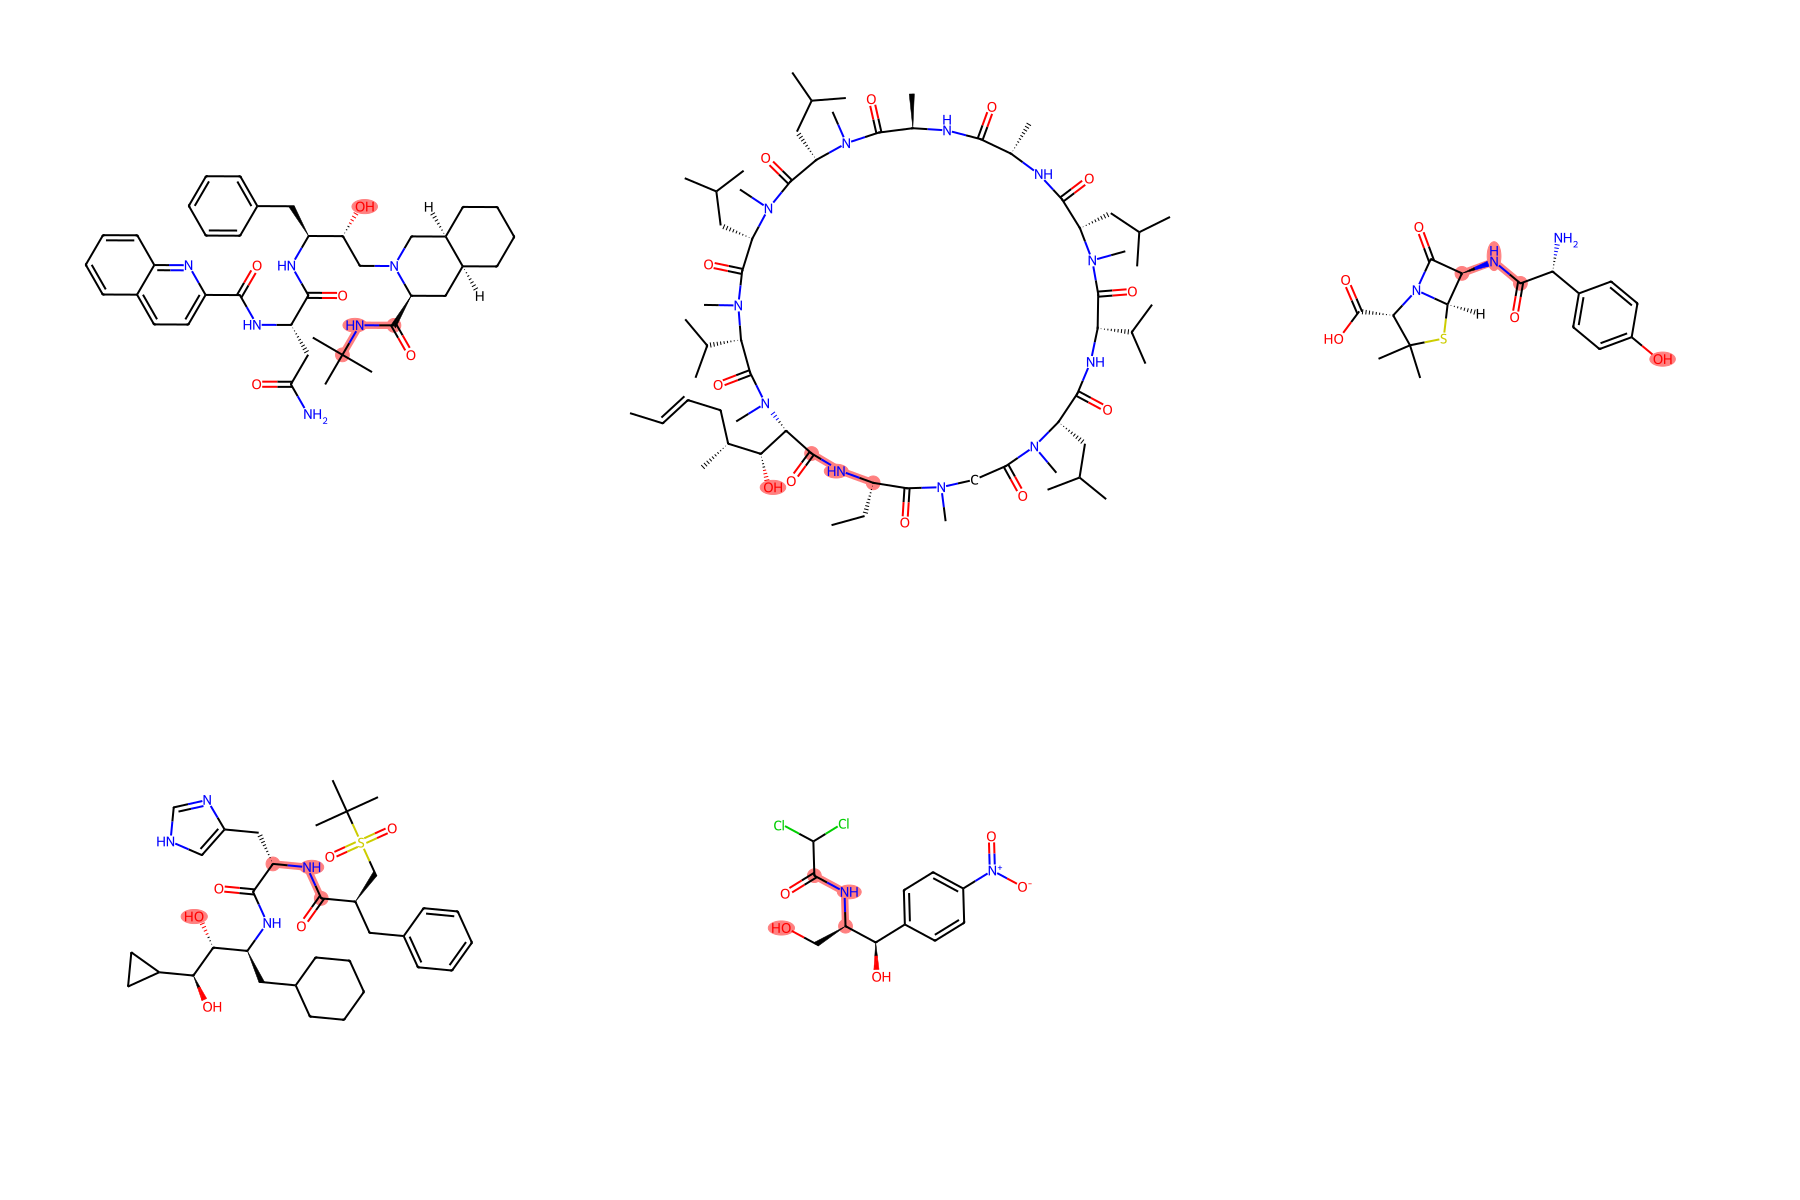

In [57]:
highlighter_instance = highlighter.highlighter(mols)

highlighter_instance.highlighting(fingerprint_numbers=[[3,779],[3,779],[3,779],[3,779],[3,779]])